In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Gold%20Price%20Data/gld_price_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


<AxesSubplot:>

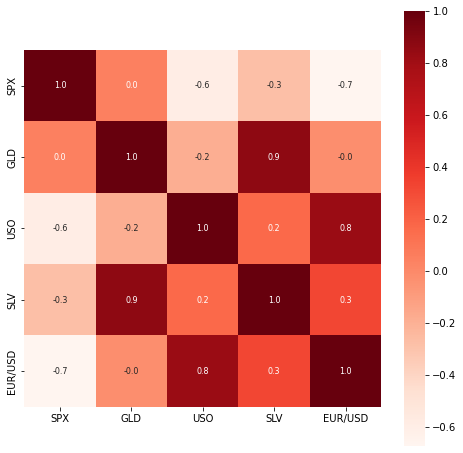

In [10]:
correlation = gold_data.corr()
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [11]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

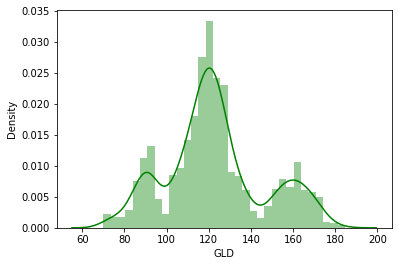

In [12]:
sns.distplot(gold_data['GLD'], color='green')

In [13]:
X = gold_data.drop(["Date","GLD"], axis=1)
Y = gold_data["GLD"]

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [16]:
regressor = RandomForestRegressor(n_estimators=100)
regressor

RandomForestRegressor()

In [17]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [18]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.80269975  82.0086     115.88800021 127.6034007  120.79650132
 154.62409788 150.38769817 126.15670044 117.57269895 125.98780106
 116.77860092 172.31790115 141.04749944 167.94559826 115.06370022
 117.77810045 140.68830354 170.08650091 159.28120189 160.02119866
 155.22000072 125.52449978 176.63929973 157.41940324 125.18680019
  93.76979956  76.94300046 120.38709973 119.05229908 167.52489962
  88.1491005  125.29930007  91.2382007  117.71620009 121.1194992
 136.15600147 115.41550112 115.72490037 146.90350008 107.36950083
 104.48860239  87.26749818 126.4593006  117.80270034 153.42679984
 119.61170038 108.32170017 108.06099823  93.15840041 127.1784974
  74.62620053 113.70009928 121.18350015 111.15459912 118.92659907
 120.62869963 159.77979944 168.54960081 147.01539672  85.76779849
  94.28210035  86.77899899  90.29250029 118.98090079 126.35050031
 127.45700034 169.09539928 122.28499915 117.46559881  98.56080028
 167.29170198 142.61199765 132.06750307 121.27770242 120.83909938
 119.6779005

In [19]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.9894884129817294


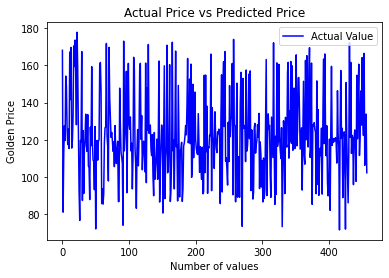

In [20]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

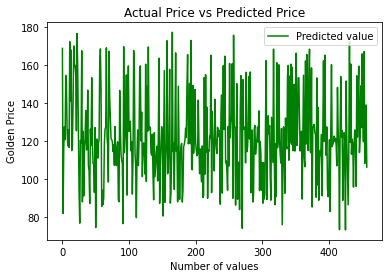

In [21]:
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

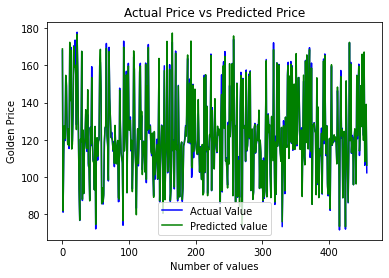

In [22]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()